In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load data

In [3]:
# ddl datasets
data_parc = pd.read_excel('IFN/data_parcelles_with_gps.xlsx')
data_trees = pd.read_excel('IFN/data_trees.xlsx')
data_m_accr = pd.read_excel('IFN/data_m_accr_with_gps.xlsx')

In [4]:
# removing useless columns
data_parc.drop(['Unnamed: 0','INVNR'],axis=1, inplace=True)
data_trees.drop(['Unnamed: 0','INVNR'],axis=1, inplace=True)
data_m_accr.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
# adding LFI id
data_m_accr['LFI'] = data_m_accr['LFI'].apply(lambda s : s.split('-')[1])

In [6]:
data_parc.head()

,PARCELLE,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,ASPECT25,PERF_CROI,...,V_LARCH,V_ARVEN,V_UENDH,V_BUCHE,V_AHORN,V_ESCHE,V_EICHE,V_CASTA,V_UELBH,LFI
0,51,47.781623,8.612822,715.918970,1,3,1984-04-10,58.407726,67.342415,4676,...,0.0,0.0,0.0,184.359112,0.0,0.0,0.0,0.0,0.000000,LFI1
1,51,47.781623,8.612822,715.918970,1,3,1994-10-19,58.407726,67.342415,4676,...,0.0,0.0,0.0,241.199369,0.0,0.0,0.0,0.0,0.000000,LFI2
2,51,47.781623,8.612822,715.918970,1,3,2011-11-09,58.407726,67.342415,4676,...,0.0,0.0,0.0,347.025988,0.0,0.0,0.0,0.0,0.000000,LFI4
3,51,47.781623,8.612822,715.918970,1,3,2005-11-01,58.407726,67.342415,4676,...,0.0,0.0,0.0,311.861351,0.0,0.0,0.0,0.0,9.259809,LFI3
4,384,47.736528,8.625154,563.829759,1,2,1995-07-10,55.683254,253.354935,3402,...,0.0,0.0,0.0,191.500642,0.0,0.0,0.0,0.0,0.000000,LFI2


- conversion spatial coordinates in international referential

In [7]:
c = 0
for parc in data_parc['PARCELLE'].unique():
    if data_parc.loc[data_parc['PARCELLE']==parc,'LAT'].std() != 0 or data_parc.loc[data_parc['PARCELLE']==parc,'LON'].std() != 0:
        c+=1
print(c)

0


In [8]:
c = 0
for parc in data_m_accr['PARCELLE'].unique():
    if data_m_accr.loc[data_m_accr['PARCELLE']==parc,'LAT'].std() > 0.0001 or data_m_accr.loc[data_m_accr['PARCELLE']==parc,'LON'].std() > 0.0001:
        c+=1
print(c)

0


In [9]:
c = 0
for parc in data_m_accr['PARCELLE'].unique():
    for lfi in data_m_accr['LFI'].unique():
        to_keep_1 = (data_m_accr['PARCELLE']==parc) & (data_m_accr['LFI']==lfi)
        to_keep_2 = (data_parc['PARCELLE']==parc) & (data_parc['LFI']==lfi)
        diff_lat = abs(float(data_m_accr.loc[to_keep_1,:]['LAT']) - float(data_parc.loc[to_keep_2,:]['LAT']))
        diff_lon = abs(float(data_m_accr.loc[to_keep_1,:]['LON']) - float(data_parc.loc[to_keep_2,:]['LON']))
    if diff_lat >= 0.0001 or diff_lon >= 0.0001:
         c+=1
print(c)

0


## 2. merge plot, mortality and increment datasets

In [10]:
data_parc_m_accr = data_parc.merge(data_m_accr, how='outer', on=['PARCELLE','LFI'])

In [11]:
data_parc_m_accr.rename(columns={'LAT_x':'LAT','LON_x':'LON'}, inplace=True)

In [12]:
data_parc_m_accr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9612 entries, 0 to 9611
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PARCELLE                    9612 non-null   int64         
 1   LAT                         9612 non-null   float64       
 2   LON                         9612 non-null   float64       
 3   ALT                         9612 non-null   float64       
 4   PRODREG                     9612 non-null   int64         
 5   HT_VEG                      9612 non-null   int64         
 6   DATE                        9612 non-null   datetime64[ns]
 7   SLOPE25                     9612 non-null   float64       
 8   ASPECT25                    9612 non-null   float64       
 9   PERF_CROI                   9612 non-null   int64         
 10  QUAL_STATION                9612 non-null   int64         
 11  UNIT_VEG_FINE               9612 non-null   int64       

In [13]:
data_parc_m_accr.drop(['LAT_y','LON_y'], axis=1, inplace=True)

## 3. tree dataset

In [14]:
data_trees.loc[data_trees["AGE_ARBRE"] != 560, ]

,PARCELLE,DATE,BANR,AZI,DIST,ESPECES_56,ESPECES,ETAT_ARBRE,DBH,HAUTEUR_ARBRE,ETAGE,AGE_ARBRE,ENDOMMAGEMENT,NB_DEGAT_ARBRE,LFI
0,51,1984-04-10,81083.0,22.0,8.00,10.0,1.0,2.0,25.0,24.0,1.0,NaN,-1.0,-1.0,LFI1
1,51,1984-04-10,81074.0,309.0,2.10,50.0,7.0,2.0,34.0,NaN,1.0,NaN,-1.0,-1.0,LFI1
2,51,1984-04-10,81077.0,105.0,4.20,10.0,1.0,2.0,38.0,26.0,1.0,NaN,-1.0,-1.0,LFI1
3,51,1984-04-10,81080.0,242.0,5.90,50.0,7.0,2.0,23.0,NaN,1.0,NaN,-1.0,-1.0,LFI1
4,51,1984-04-10,81081.0,362.0,6.20,50.0,7.0,2.0,18.0,NaN,1.0,NaN,-1.0,-1.0,LFI1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134911,165065,2013-10-09,102648.0,137.0,8.45,62.0,11.0,-1.0,NaN,NaN,-1.0,NaN,-1.0,-1.0,LFI4
134912,165065,2013-10-09,102645.0,113.0,3.50,80.0,12.0,-1.0,NaN,NaN,-1.0,NaN,-1.0,-1.0,LFI4
134913,165065,2013-10-09,282953.0,26.0,7.50,9.0,12.0,-1.0,NaN,NaN,-1.0,NaN,-1.0,-1.0,LFI4
134914,165065,2013-10-09,102650.0,24.0,12.90,62.0,11.0,2.0,62.0,NaN,1.0,100.0,1.0,1.0,LFI4


In [15]:
# calculation of median
var_to_med = ["PARCELLE", "LFI", "DBH", "HAUTEUR_ARBRE", "AGE_ARBRE"]
tree_med = data_trees[var_to_med].groupby(['PARCELLE','LFI']).median().reset_index()
tree_med.head()

,PARCELLE,LFI,DBH,HAUTEUR_ARBRE,AGE_ARBRE
0,51,LFI1,23.0,16.00,NaN
1,51,LFI2,26.0,25.00,NaN
2,51,LFI3,29.0,29.00,NaN
3,51,LFI4,30.5,30.55,80.0
4,384,LFI1,44.0,28.50,NaN


In [16]:
# calculation of the most represented category
for c in ["ETAGE", "ENDOMMAGEMENT", "NB_DEGAT_ARBRE"]:
    tree_med[c] = data_trees[c].value_counts().reset_index().iloc[0,0]

In [17]:
tree_med.head()

,PARCELLE,LFI,DBH,HAUTEUR_ARBRE,AGE_ARBRE,ETAGE,ENDOMMAGEMENT,NB_DEGAT_ARBRE
0,51,LFI1,23.0,16.00,NaN,1.0,1.0,1.0
1,51,LFI2,26.0,25.00,NaN,1.0,1.0,1.0
2,51,LFI3,29.0,29.00,NaN,1.0,1.0,1.0
3,51,LFI4,30.5,30.55,80.0,1.0,1.0,1.0
4,384,LFI1,44.0,28.50,NaN,1.0,1.0,1.0


- final merge

In [18]:
big_data = data_parc_m_accr.merge(tree_med, on=['PARCELLE','LFI'], how='outer')

In [19]:
display(big_data)
print(big_data.shape)

,PARCELLE,LAT,LON,ALT,PRODREG,HT_VEG,DATE,SLOPE25,ASPECT25,PERF_CROI,...,ACCR,UNIT_ACCR_NDH,UNIT_ACCR_LBH,UNIT_ACCR,DBH,HAUTEUR_ARBRE,AGE_ARBRE,ETAGE,ENDOMMAGEMENT,NB_DEGAT_ARBRE
0,51,47.781623,8.612822,715.918970,1,3,1984-04-10,58.407726,67.342415,4676,...,NaN,NaN,NaN,NaN,23.0,16.00,NaN,1.0,1.0,1.0
1,51,47.781623,8.612822,715.918970,1,3,1994-10-19,58.407726,67.342415,4676,...,131.3,4.7,7.3,11.9,26.0,25.00,NaN,1.0,1.0,1.0
2,51,47.781623,8.612822,715.918970,1,3,2011-11-09,58.407726,67.342415,4676,...,84.1,8.0,6.0,14.0,30.5,30.55,80.0,1.0,1.0,1.0
3,51,47.781623,8.612822,715.918970,1,3,2005-11-01,58.407726,67.342415,4676,...,110.6,4.8,5.3,10.1,29.0,29.00,NaN,1.0,1.0,1.0
4,384,47.736528,8.625154,563.829759,1,2,1995-07-10,55.683254,253.354935,3402,...,124.5,8.6,2.2,10.8,45.5,32.00,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,165003,45.869258,9.035470,668.776978,5,2,1985-03-18,57.909958,319.882141,3660,...,NaN,NaN,NaN,NaN,43.5,11.50,NaN,1.0,1.0,1.0
9608,165065,45.860080,9.048080,996.563990,5,3,1995-05-09,46.400490,228.468475,2341,...,37.5,0.4,3.4,3.7,17.0,NaN,NaN,1.0,1.0,1.0
9609,165065,45.860080,9.048080,996.563990,5,3,1985-03-14,46.400490,228.468475,2341,...,NaN,NaN,NaN,NaN,45.0,17.00,NaN,1.0,1.0,1.0
9610,165065,45.860080,9.048080,996.563990,5,3,2006-04-13,46.400490,228.468475,2341,...,45.9,1.9,2.3,4.2,19.0,18.00,NaN,1.0,1.0,1.0


(9612, 103)


- saving

In [20]:
big_data.to_excel('IFN/data_big_merge_base_V2.xlsx')

## 4. heatmap

<AxesSubplot: >

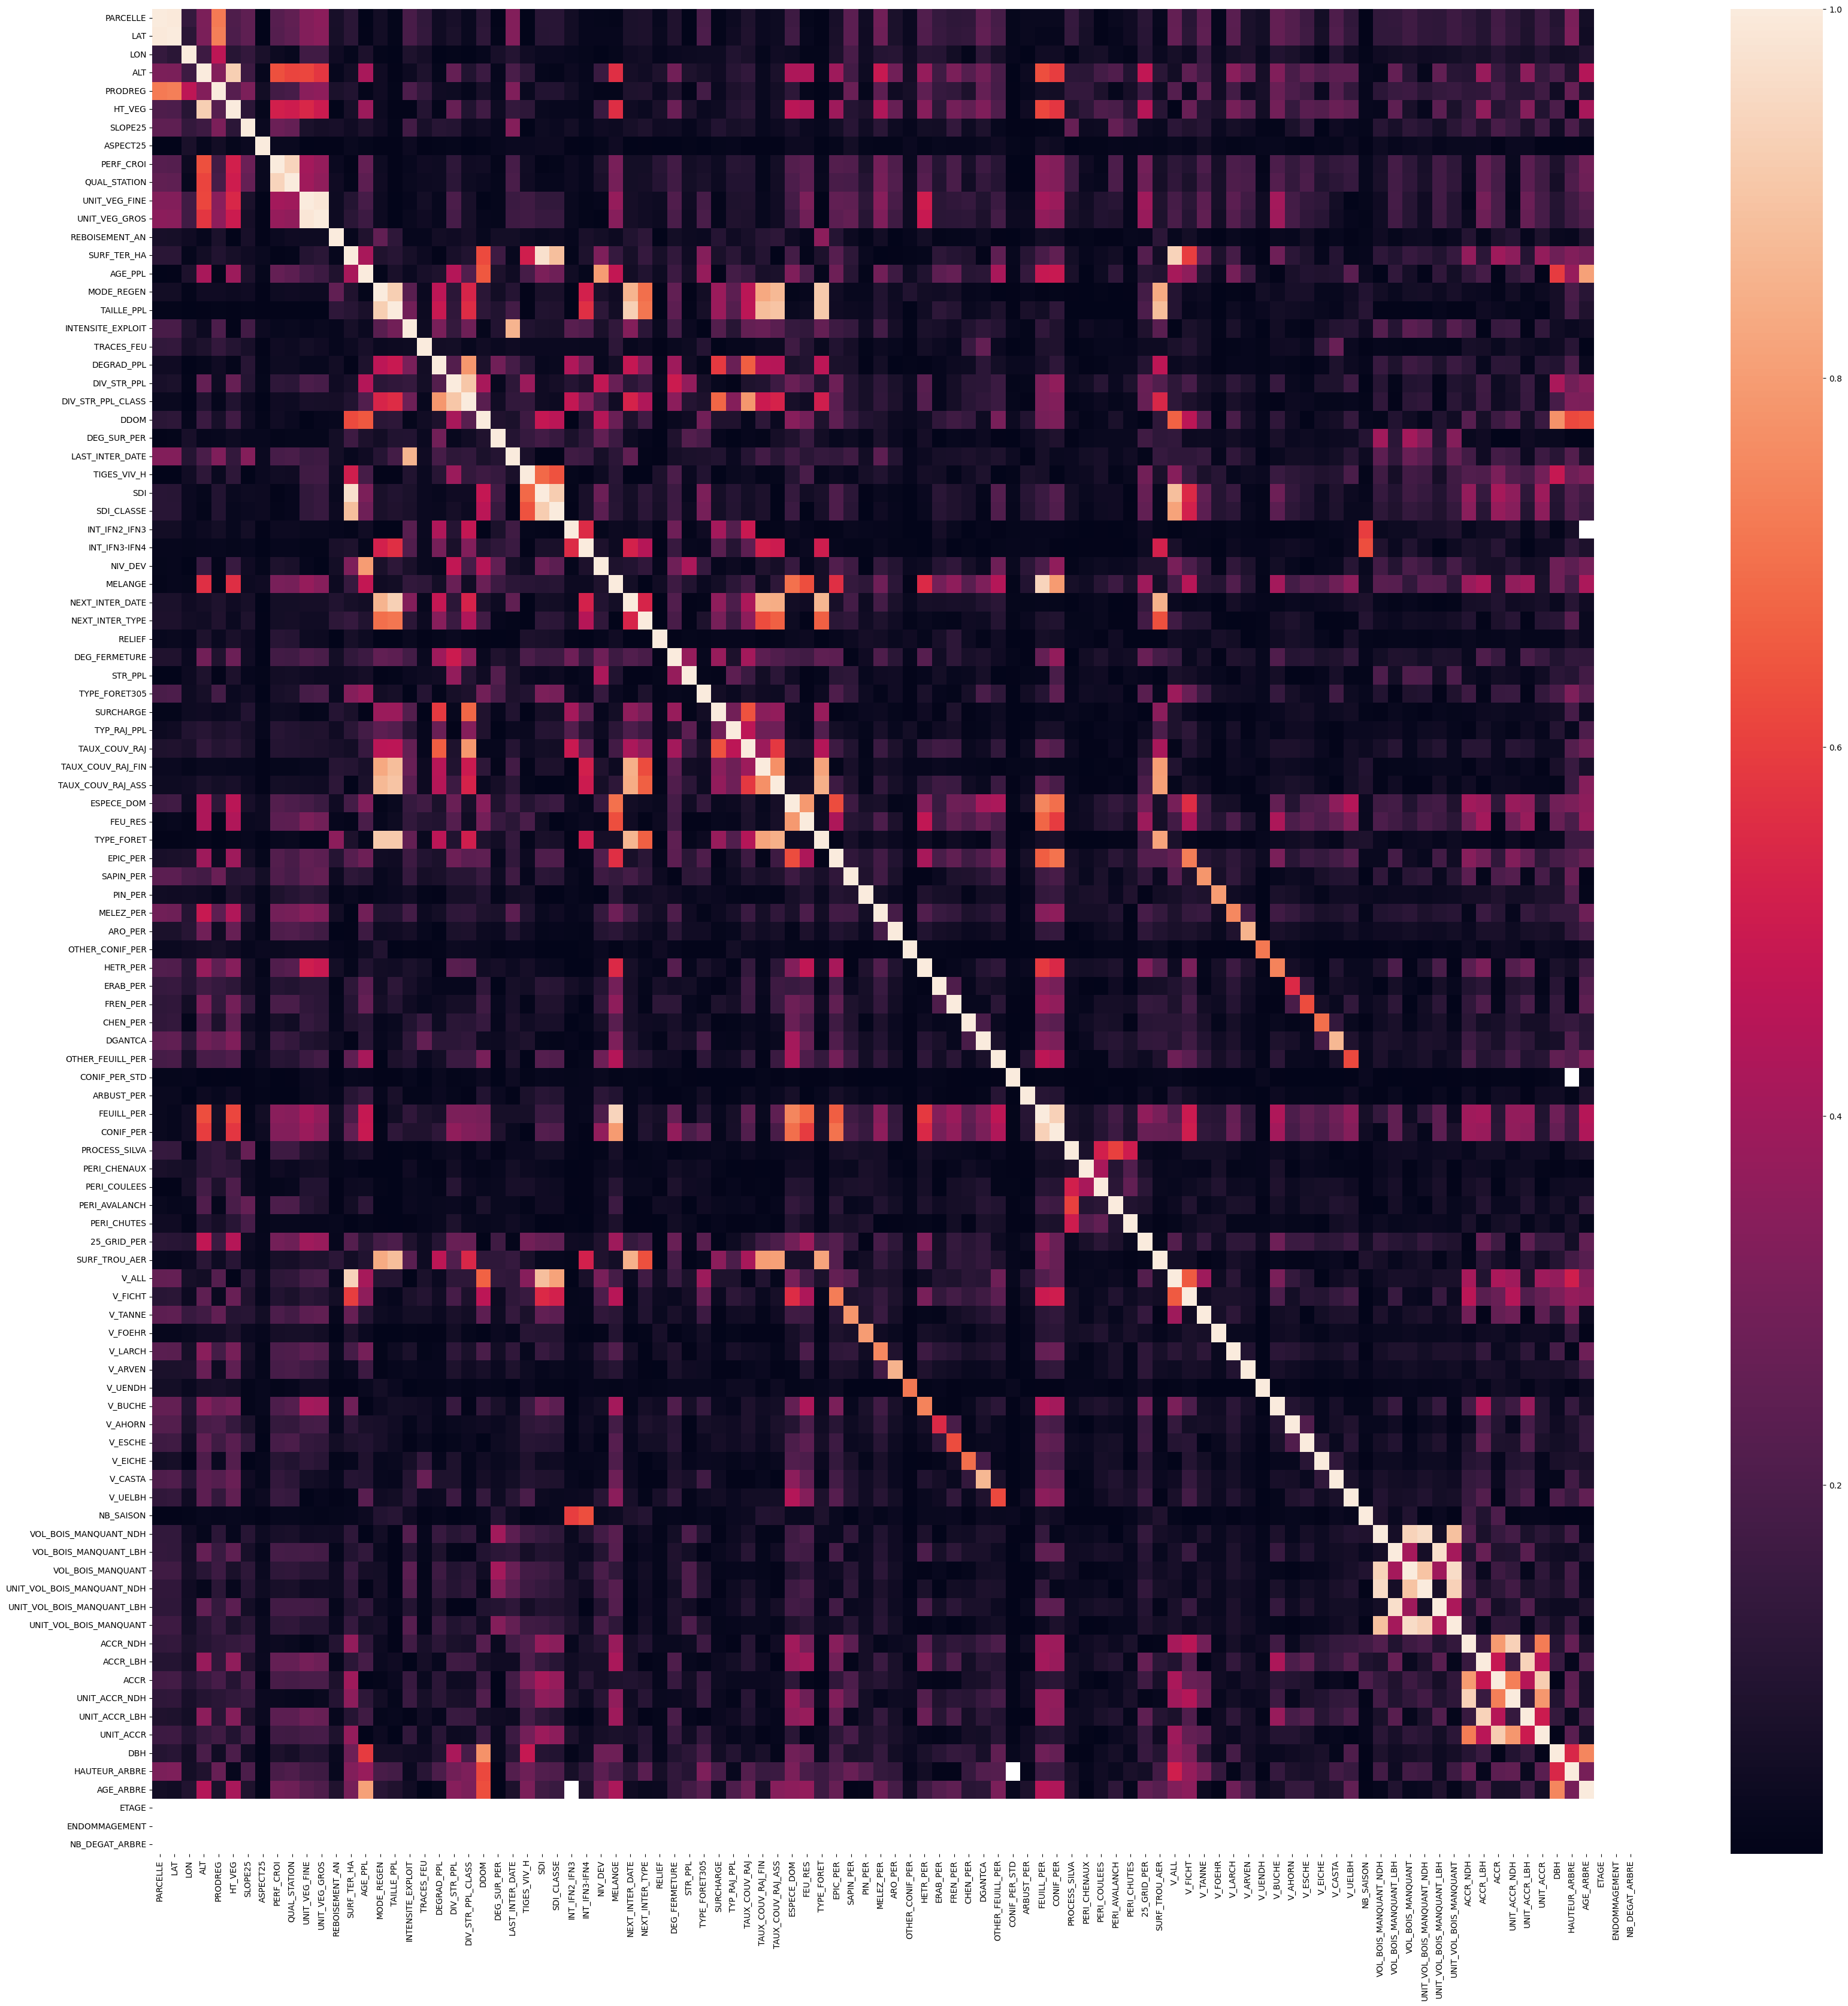

In [21]:
plt.figure(figsize = (40,40))
data_corr = big_data.corr()
sns.heatmap(abs(data_corr))